<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week12%20-%20Classification2/Walkthrough/Walkthrough_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

For classification we can use different algorithms, for example: 
- Logisitic regression (seen last week)
- K-Nearest Neighbours
- Decision Tree
- Random Forest
- Gradient Descent
- etc. 

This week we will cover **K-Nearest Neighbours** and **Decision Trees**.




For the walkthrough we will use a dataset with *fruits*  and show two new classification algorithms. Independently on which algorithm we use, we need to: 
- Load our dataset
- Define our dependent and independent variables
- Split our dataset into train and test subsets
- Normalize our dataset
- Create the model (regression, KNN, decision tree, ...)
- Train our model 
- Check the accuracy

In [ ]:
#Load dataset
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Fruits.csv'
fruits = pd.read_csv(url,sep=";")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,1,apple,braeburn,178,7.1,7.8,0.92
4,1,apple,braeburn,172,7.4,7.0,0.89


Here, we want to predict the class (`fruit label`) using other features.



In [ ]:
#Define features and target variable
features = ['mass', 'width', 'height', 'color_score']
X = fruits[features]
y = fruits['fruit_label']

Let's see the different classes

In [ ]:
print(fruits['fruit_name'].unique())

['apple' 'orange']


### 1. Split into Train and Test Set
 
The data is split randomly into train and test subsets. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We use the test set in order to test our prediction on this subset.


In [ ]:
#Split data set into a train and a test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### (2. Normalization) This step is not necessary since no feature normalization or scaling typically needed

When we have a dataset with features that have very distinct ranges (for example one feature where the age is between 0 and 99 year and another feature being the income ranging from 1'000CHF to 200'000CHF), we might get biaised results. We want the features to be in the same or similar ranges. Therefore, we **normalize** the data. It involves scaling all values for a specific feature given attribute so that they fall within a small specified range.
We can use the *StandardScaler()*, the *MinMaxScaler* () or other scalers for the normalization.
<br>

In our example we will normalize our **train AND test set** using the MinMaxScaler.

**IMPORTANT**: When you normalize the train set, you need to do the same modificaiton (here normalization) to the test set. 

In [ ]:
#Define normalization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train, y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
#Apply normalization
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 3. K-Nearest Neighbor

The KNN algorithm classifies new examples considering the most represented class among the K nearest neighbors in the hyperspace. This means that if k = 1, the object is simply assigned to the class of the single nearest neighbor. If k = 5, then the classification of the object will be based on a majority vote of the 5 nearest datapoints. It is simple to implement, robust to noisy training set, and effective if the training set is large. Nevertheless, we need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples. <br>

As seen before, we will first need to create our model. We will build the model from the **training set**. We have already split our dataset into **test** and **trainig sets**. 

Here we need to specify **how many neighbors** are to be considered in the classification when creating the model. 

In [ ]:
#Create model with K=10
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(10)

In [ ]:
#Fit model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
#Use model on test and check accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.86
Accuracy of KNN classifier on test set: 0.80


We chose k = 10 arbitrarily, maybe we can have a better accuracy with another number. Similarly we could change other parameters. Let's try with a different **weight** which gives less importance to far away points and to **p** to change the way we compute distance between 2 points [See here for information on p-norm](https://en.wikipedia.org/wiki/Minkowski_distance). Let's try for different values.

In [ ]:
n_neighbors = [2,3,4,5]
p_values = [1,2,3]
weights = ['uniform', 'distance']
for n in n_neighbors:
    for p in p_values:
        for w in weights:
            model = KNeighborsClassifier(n_neighbors=n, p=p, weights=w)
            model.fit(X_train, y_train)
            print("accuracy for k = " + str(n) + ", p = " + str(p) + ", weight = " + w + " : " + str(model.score(X_test, y_test)))

accuracy for k = 2, p = 1, weight = uniform : 1.0
accuracy for k = 2, p = 1, weight = distance : 1.0
accuracy for k = 2, p = 2, weight = uniform : 0.8
accuracy for k = 2, p = 2, weight = distance : 0.9
accuracy for k = 2, p = 3, weight = uniform : 0.8
accuracy for k = 2, p = 3, weight = distance : 0.9
accuracy for k = 3, p = 1, weight = uniform : 1.0
accuracy for k = 3, p = 1, weight = distance : 1.0
accuracy for k = 3, p = 2, weight = uniform : 1.0
accuracy for k = 3, p = 2, weight = distance : 1.0
accuracy for k = 3, p = 3, weight = uniform : 0.9
accuracy for k = 3, p = 3, weight = distance : 0.9
accuracy for k = 4, p = 1, weight = uniform : 1.0
accuracy for k = 4, p = 1, weight = distance : 1.0
accuracy for k = 4, p = 2, weight = uniform : 0.9
accuracy for k = 4, p = 2, weight = distance : 1.0
accuracy for k = 4, p = 3, weight = uniform : 0.9
accuracy for k = 4, p = 3, weight = distance : 0.9
accuracy for k = 5, p = 1, weight = uniform : 0.9
accuracy for k = 5, p = 1, weight = dista

### 4. Decision Tree
A decision tree classifier relies on a decision tree to predict the class of a new datapoint. In fact, it produces a sequence of rules that can be used to classify the data. It is a great algorithm as it is easy to understand and visualize. Furthermore, it can handle numerical and categorical data.

 **Warning:** It is possible that decision trees build models that are too complexe or that cannot generalize well (overfitting). It can also be unstable, as small variations in the data set might cause the generation of a completely different tree. <br>

Before building it we need to specify the maximum depth of our tree, which represents the amount of nodes we allow the tree to generate.

In [ ]:
#create, fit and test model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

1.0


We achieve perfection on the test set, but our model may be overly complicated. Let's see if we can reduce max depth without losing accuracy.
Let's randomly try some numbers. 

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7


In [ ]:
#fonction to find lowest depth (less complicated model) keeping an accuracy of 1
depth = 5
model = DecisionTreeClassifier(max_depth = depth)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
while accuracy == 1:
    depth -= 1
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
print(depth+1)

2


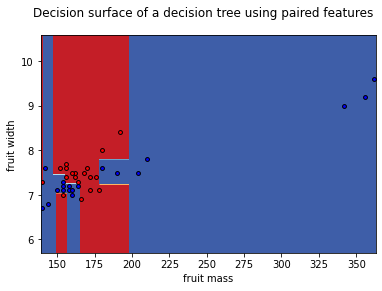

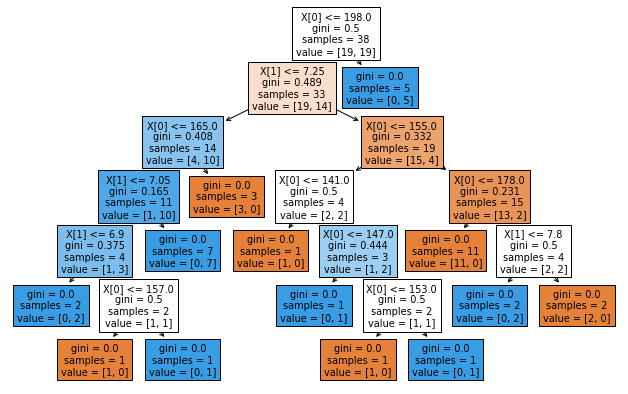

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

plot_colors = "rb"
plot_step = 0.02


X = X[['mass', 'width']].values

clf = DecisionTreeClassifier().fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel('fruit mass')
plt.ylabel('fruit width')

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y == i+1)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.axis("tight")

plt.figure(figsize=(11,7))
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf, filled=True)
plt.show()